# Check motion capture system coverage

Do imports.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ae483tools import *

Define a function to check data from a given flight.

In [2]:
def check_data(filename):
    # Load data
    raw_data_drone, raw_data_mocap = load_hardware_data(filename)

    # Compute statistics
    how_many_timesteps = len(raw_data_mocap['z'])
    how_many_dropouts = len(np.argwhere(np.isnan(raw_data_mocap['z'])).flatten())
    percent_coverage = 100. * (1. - (how_many_dropouts / how_many_timesteps))
    elapsed_time = raw_data_mocap['time'][-1] - raw_data_mocap['time'][0]
    sample_rate = how_many_timesteps / elapsed_time

    # Plot data (with relevant statistics in the title)
    fig, ax = plt.subplots(1, 1, figsize=(7, 3), tight_layout=True)
    ax.plot(raw_data_mocap['time'], raw_data_mocap['z'])
    ax.set_xlabel('t (seconds)')
    ax.set_ylabel('z (meters)')
    ax.set_ylim(0., 1.)
    ax.set_title(f'({filename}) Tracked {percent_coverage:.1f}% of {how_many_timesteps} time steps at about {sample_rate:.0f} Hz')
    ax.grid()

Check `force_data.json`.

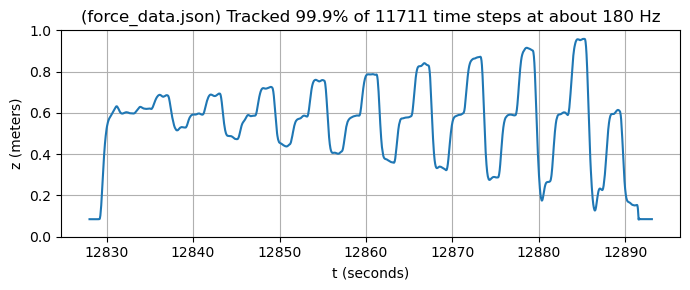

In [3]:
check_data('force_data.json')

In [4]:
z_max= np.linspace (0.52,0.7,10)
z_min= np.linspace (0.48,0.30,10)

z_max, z_min

(array([0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64, 0.66, 0.68, 0.7 ]),
 array([0.48, 0.46, 0.44, 0.42, 0.4 , 0.38, 0.36, 0.34, 0.32, 0.3 ]))

Check `moment_data.json`.

In [ ]:
check_data('moment_data.json')